In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import joblib

C:\Users\Keshav\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Keshav\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Keshav\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
loan_dataset = pd.read_csv(r'./loan_prediction.csv')
loan_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EDA for Continious Coloums

In [4]:
loan_dataset[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<AxesSubplot:>

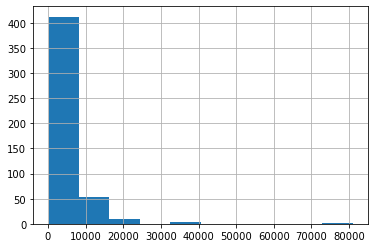

In [43]:
loan_dataset['ApplicantIncome'].hist(bins=10)

<AxesSubplot:>

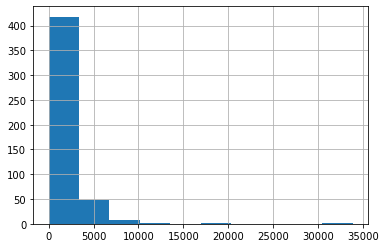

In [44]:
loan_dataset['CoapplicantIncome'].hist(bins=10)

<AxesSubplot:>

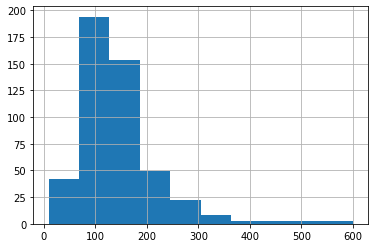

In [45]:
loan_dataset['LoanAmount'].hist(bins=10)

# Check NULL value

In [5]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### drop no data

In [6]:
loan_dataset = loan_dataset.dropna()

# unique value counts

In [7]:
loan_dataset['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [8]:
loan_dataset['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [9]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [10]:
loan_dataset['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [11]:
loan_dataset['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [12]:
loan_dataset['Loan_Amount_Term'].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: Loan_Amount_Term, dtype: int64

In [13]:
loan_dataset['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [14]:
loan_dataset['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [15]:
loan_dataset['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

# one hot encoding

In [16]:
one_hot_encoding_features = ["Property_Area","Loan_Amount_Term","Self_Employed","Education","Dependents","Married","Gender"]

In [17]:
new_load_dataset = pd.get_dummies(loan_dataset, columns = one_hot_encoding_features)
new_load_dataset.head(5)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_36.0,...,Education_Graduate,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Married_No,Married_Yes,Gender_Female,Gender_Male
1,LP001003,4583,1508.0,128.0,1.0,N,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
2,LP001005,3000,0.0,66.0,1.0,Y,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,1.0,Y,0,0,1,0,...,0,1,1,0,0,0,0,1,0,1
4,LP001008,6000,0.0,141.0,1.0,Y,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
5,LP001011,5417,4196.0,267.0,1.0,Y,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1


# Label encoder

In [18]:
le = preprocessing.LabelEncoder()
new_load_dataset['Loan_Status_binary'] = le.fit_transform(new_load_dataset.Loan_Status.values)


In [35]:
new_load_dataset['Loan_Status_binary'].value_counts()

1    332
0    148
Name: Loan_Status_binary, dtype: int64

In [19]:
new_load_dataset = new_load_dataset.drop(["Loan_ID","Loan_Status"],axis=1)

In [20]:
new_load_dataset.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,...,Education_Not Graduate,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Married_No,Married_Yes,Gender_Female,Gender_Male,Loan_Status_binary
1,4583,1508.0,128.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,3000,0.0,66.0,1.0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,1.0,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
4,6000,0.0,141.0,1.0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
5,5417,4196.0,267.0,1.0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,1


### Machine Learning Model

In [21]:
### dived datat into depended and indepedent features
X = new_load_dataset.drop(["Loan_Status_binary"], axis=1)
Y = new_load_dataset["Loan_Status_binary"]

In [22]:
### split the data into train(80%) & test (20%)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Logistic Regression

In [23]:
### intitilze LR model
lr=LogisticRegression(max_iter=500)

### fit the LR model on train dataset
lr.fit(X_train,Y_train)


### Modle Training Performance
print("model performance on train data\n")
Y_pred_train=lr.predict(X_train)
print('Confusion matrix for train data')

print(confusion_matrix(Y_train,Y_pred_train))

print('Classification Report for train data')
print(classification_report(Y_train,Y_pred_train))


train_accuracy=accuracy_score(Y_train,Y_pred_train)
print('accuracy score for train data:{:.2f}%'.format(train_accuracy*100))



print("\n\n")
print("model performance on test data\n")
Y_pred=lr.predict(X_test)
print('Confusion matrix for test data')

print(confusion_matrix(Y_test,Y_pred))

print('Classification Report for test data')
print(classification_report(Y_test,Y_pred))

from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(Y_test,Y_pred)
print('accuracy score for test data:{:.2f}%'.format(test_accuracy*100))

model performance on train data

Confusion matrix for train data
[[ 51  62]
 [  6 265]]
Classification Report for train data
              precision    recall  f1-score   support

           0       0.89      0.45      0.60       113
           1       0.81      0.98      0.89       271

   micro avg       0.82      0.82      0.82       384
   macro avg       0.85      0.71      0.74       384
weighted avg       0.84      0.82      0.80       384

accuracy score for train data:82.29%



model performance on test data

Confusion matrix for test data
[[14 21]
 [ 1 60]]
Classification Report for test data
              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.74      0.98      0.85        61

   micro avg       0.77      0.77      0.77        96
   macro avg       0.84      0.69      0.70        96
weighted avg       0.81      0.77      0.74        96

accuracy score for test data:77.08%


C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Rando Forest

In [28]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15],
    'n_estimators': [10,30,70,100]
}

rf=RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 2)

grid_search.fit(X_train,Y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] bootstrap=True, max_depth=5, n_estimators=10 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=5, n_estimators=10 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=5, n_estimators=10 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_depth=5, n_estimators=30 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=30, total=   0.0s
[CV] bootstrap=True, max_depth=5, n_estimators=30 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... bootstrap=True, max_depth=5, n_estimators=30, total=   0.0s
[CV] bootstrap=True, max_depth=5, n_estimators=30 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=30, total=   0.0s
[CV] bootstrap=True, max_depth=5, n_estimators=70 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=70, total=   0.0s
[CV] bootstrap=True, max_depth=5, n_estimators=70 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=70, total=   0.0s
[CV] bootstrap=True, max_depth=5, n_estimators=70 ....................
[CV] ..... bootstrap=True, max_depth=5, n_estimators=70, total=   0.0s
[CV] bootstrap=True, max_depth=5, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=5, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=5, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=5, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=5, n_estimators=100 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.5s finished
C:\Users\Keshav\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15], 'n_estimators': [10, 30, 70, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [29]:
print("best model parameter")
print(grid_search.best_estimator_)

### Modle Training Performance
print("model performance on train data\n")
Y_pred_train=grid_search.predict(X_train)
print('Confusion matrix for train data')

print(confusion_matrix(Y_train,Y_pred_train))

print('Classification Report for train data')
print(classification_report(Y_train,Y_pred_train))


train_accuracy=accuracy_score(Y_train,Y_pred_train)
print('accuracy score for train data:{:.2f}%'.format(train_accuracy*100))



print("\n\n")
print("model performance on test data\n")
Y_pred=grid_search.predict(X_test)
print('Confusion matrix for test data')

print(confusion_matrix(Y_test,Y_pred))

print('Classification Report for test data')
print(classification_report(Y_test,Y_pred))

from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(Y_test,Y_pred)
print('accuracy score for test data:{:.2f}%'.format(test_accuracy*100))

best model parameter
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model performance on train data

Confusion matrix for train data
[[ 87  26]
 [  0 271]]
Classification Report for train data
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       113
           1       0.91      1.00      0.95       271

   micro avg       0.93      0.93      0.93       384
   macro avg       0.96      0.88      0.91       384
weighted avg       0.94      0.93      0.93       384

accuracy score for train data:93.23%



model performance on test data

Confusion matrix for test data
[[

# SUpport Vector Classfier

In [31]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']}


svc = svm.SVC()
grid_search_svc = GridSearchCV(estimator = svc, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 2)

grid_search_svc.fit(X_train,Y_train)




Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [33]:
print("best model parameter")
print(grid_search_svc.best_estimator_)

### Modle Training Performance
print("model performance on train data\n")
Y_pred_train=grid_search_svc.predict(X_train)
print('Confusion matrix for train data')

print(confusion_matrix(Y_train,Y_pred_train))

print('Classification Report for train data')
print(classification_report(Y_train,Y_pred_train))


train_accuracy=accuracy_score(Y_train,Y_pred_train)
print('accuracy score for train data:{:.2f}%'.format(train_accuracy*100))



print("\n\n")
print("model performance on test data\n")
Y_pred=grid_search_svc.predict(X_test)
print('Confusion matrix for test data')

print(confusion_matrix(Y_test,Y_pred))

print('Classification Report for test data')
print(classification_report(Y_test,Y_pred))

from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(Y_test,Y_pred)
print('accuracy score for test data:{:.2f}%'.format(test_accuracy*100))

best model parameter
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model performance on train data

Confusion matrix for train data
[[103  10]
 [  0 271]]
Classification Report for train data
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       113
           1       0.96      1.00      0.98       271

   micro avg       0.97      0.97      0.97       384
   macro avg       0.98      0.96      0.97       384
weighted avg       0.97      0.97      0.97       384

accuracy score for train data:97.40%



model performance on test data

Confusion matrix for test data
[[ 2 33]
 [ 3 58]]
Classification Report for test data
              precision    recall  f1-score   support

           0       0.40      0.06      0.10        35
           1       0.64      0.95     

In [36]:
### best model will save as joblib


### randomf forest classfier have good f1-score for both class (yes,no). so that we will use random forest classfier for futhure 
### prediction


### for SVC f1-score is very low. It's show that model is not perform well for test dataset.
### for class 0 (loan statu NO) has very low recall .

In [39]:
# save the model to disk
filename = 'finalized_model.joblib'
joblib.dump(grid_search, filename)

['finalized_model.joblib']